In [1]:
#from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:100% !important; }</style>"))
import matplotlib.pyplot as plt
%matplotlib inline
#from mpl_toolkits import mplot3d
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
#from mpl_toolkits.axes_grid1.inset_locator import mark_inset, zoomed_inset_axes
#from tqdm.notebook import tqdm_notebook
#from kneed import KneeLocator
#from mpl_toolkits.mplot3d import Axes3D
import numpy as np
# Suppress warnings. Comment this out if you wish to see the warning messages
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
#from scipy.optimize import curve_fit
from tqdm import tqdm

# Read data

In [2]:
df = pd.read_csv('./data/beehive_10.csv')
#df.loc[df['ra'] > 300, 'ra'] -= 360 #SOLO PARA BLANCO 1
#c_pm = (df['pmra'] > -30) & (df['pmra'] < 0) & (df['pmdec'] > 0) & (df['pmdec'] < 30)
#df = df[c_pm]
df = df.fillna(0)
#df['parallax'] = df['parallax'] / 1000
#df['parallax_error'] = df['parallax_error'] / 1000
print(df.shape)
df

(80703, 20)


,source_id,ra,ra_error,dec,dec_error,parallax,parallax_error,pmra,pmra_error,pmdec,pmdec_error,g,g_error,rp,rp_error,bp,bp_error,rv,rv_error,ruwe
0,686364842239654272,134.709698,0.014975,22.992431,0.007419,2.085333,0.016962,-3.374734,0.018030,-21.015680,0.012807,12.602804,29.330334,12.054686,42.864822,12.989428,48.483260,13.169156,3.194307,1.017672
1,686365430651121152,134.756474,0.027742,23.040496,0.013534,3.375674,0.032518,-15.149370,0.033771,-15.838613,0.022323,15.184184,4.347089,14.274037,15.242049,16.034643,15.433195,26.838780,10.468080,1.020072
2,686365842967980800,134.816346,0.168398,23.024602,0.078895,2.663528,0.177916,9.703093,0.199902,-24.786198,0.128362,18.289850,1.228959,17.109737,13.022298,19.710253,8.768816,0.000000,0.000000,0.993684
3,686365911687456384,134.849527,0.014581,23.032435,0.007418,3.055874,0.016978,-29.040402,0.016710,-6.984020,0.011318,12.465494,34.933273,11.972678,56.324078,12.796334,49.977028,19.906532,1.157210,0.987843
4,686366289644577408,134.875610,0.016013,23.044446,0.007919,2.145454,0.018506,2.758835,0.018559,-2.598719,0.012359,13.452871,10.642524,12.908648,41.402565,13.829898,34.082820,25.146040,2.267879,0.939300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80698,607987736401416704,132.207004,0.015715,12.129860,0.008362,14.611774,0.017416,-51.914604,0.019587,-0.774980,0.014016,12.296417,77.566990,11.353331,172.100420,13.212118,89.278100,19.794222,0.365834,1.193319
80699,607987805120899968,132.196276,0.162734,12.136737,0.077932,2.192127,0.180130,1.502715,0.214945,-24.898594,0.134055,18.394373,1.245666,17.229494,9.748092,19.806341,7.601469,0.000000,0.000000,1.015110
80700,607988049934799104,132.202887,0.268846,12.162888,0.129836,4.295141,0.294521,-59.959016,0.341854,-46.761862,0.229012,19.087856,0.966175,17.802464,7.728075,20.715290,5.657159,0.000000,0.000000,1.046853
80701,607988084294537856,132.177699,0.043617,12.153922,0.022600,5.921312,0.048937,-44.701974,0.057444,0.487231,0.037872,16.215645,3.229286,15.081174,15.827312,17.536734,9.245587,0.000000,0.000000,1.030401


In [3]:
#plt.figure(figsize=(20,10))

#plt.subplot(2,3,1)
#plt.hist(df.parallax,bins='auto')
#plt.xlim(0.002,0.01)

#plt.subplot(2,3,2)
#plt.hist(df.ra,bins='auto')

#plt.subplot(2,3,3)
#plt.hist(df.dec,bins='auto')

#plt.subplot(2,3,4)
#plt.hist(df.pmra,bins='auto')
#plt.xlim(-100,100)

#plt.subplot(2,3,5)
#plt.hist(df.pmdec,bins='auto')
#plt.xlim(-100,100)

#plt.subplot(2,3,6)
#plt.scatter(df['ra'], df['dec'], marker='o' , s=1, alpha = 0.5)
#plt.xlabel("ra [deg]",  fontsize = 15)
#plt.ylabel("dec [deg]",  fontsize = 15)#,rotation=0)
#plt.xlim(-30,0)
#plt.ylim(0,30)

#plt.show()

2308


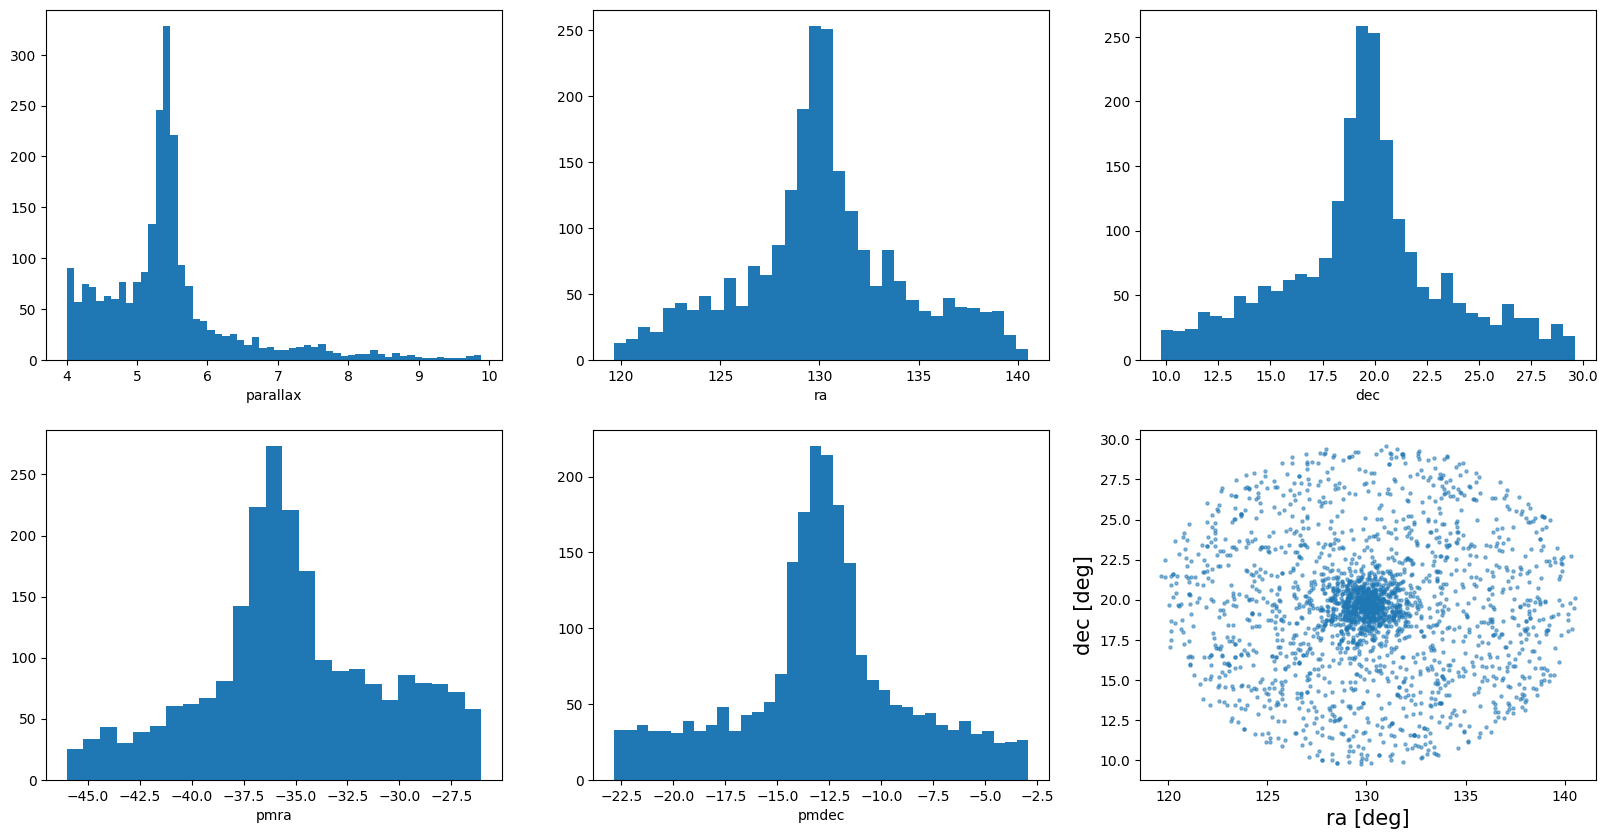

In [3]:
mu_alpha, mu_delta = -36.047, -12.917
rango = 10
c_pm=(df['pmra']>mu_alpha-rango)&(df['pmra']<mu_alpha+rango)&\
(df['pmdec']>mu_delta-rango)&(df['pmdec']<mu_delta+rango)
c_p = (df['parallax'] > 4) & (df['parallax'] < 10)

df = df[c_pm & c_p]
print(len(df))
plt.figure(figsize=(20,10))

plt.subplot(2,3,1)
plt.hist(df.parallax,bins='auto')
#lt.xlim(v_min,v_max)
plt.xlabel('parallax')

plt.subplot(2,3,2)
plt.hist(df.ra,bins='auto')
plt.xlabel('ra')

plt.subplot(2,3,3)
plt.hist(df.dec,bins='auto')
plt.xlabel('dec')

plt.subplot(2,3,4)
plt.hist(df.pmra,bins='auto')
#plt.xlim(-100,100)
plt.xlabel('pmra')

plt.subplot(2,3,5)
plt.hist(df.pmdec,bins='auto')
#plt.xlim(-100,100)
plt.xlabel('pmdec')

plt.subplot(2,3,6)
plt.scatter(df['ra'], df['dec'], marker='o' , s=5, alpha = 0.5)
plt.xlabel("ra [deg]",  fontsize = 15)
plt.ylabel("dec [deg]",  fontsize = 15)#,rotation=0)
#plt.xlim(-30,0)
#plt.ylim(0,30)
plt.show()

In [4]:
from scipy.optimize import minimize

def log_likelihood(params, x):
    nc, s1, s2, mu1, mu2 = params
    Ac = -0.5*((x - mu1)/s1)**2
    Be = -0.5*((x - mu2)/s2)**2
    y = nc/(np.sqrt(2*np.pi)*s1)*np.exp(Ac) + (1-nc)/(np.sqrt(2*np.pi)*s2)*np.exp(Be)
    # Calculate log likelihood
    return np.sum(np.log(y))

def gaussian_function(x, params):
    nc, s1, s2, mu1, mu2 = params
    Ac = -0.5*((x - mu1)/s1)**2
    Be = -0.5*((x - mu2)/s2)**2
    return nc/(np.sqrt(2*np.pi)*s1)*np.exp(Ac) + (1-nc)/(np.sqrt(2*np.pi)*s2)*np.exp(Be)

nll = lambda *args: -log_likelihood(*args)

In [5]:
sample_data = df.parallax
s1, s2 = np.std(sample_data)/2, np.std(sample_data)
mu1, mu2 = np.mean(sample_data), np.mean(sample_data)
initparams_parallax = [0.5, s1, s2, mu1, mu2]
print(log_likelihood(initparams_parallax, sample_data))
results_parallax = minimize(nll, initparams_parallax, args=(sample_data), 
                            options={"disc":True}, method='Nelder-Mead')

sample_data = df.ra
s1, s2 = np.std(sample_data)/2, np.std(sample_data)
mu1, mu2 = np.mean(sample_data), np.mean(sample_data)
initparams_ra = [0.5, s1, s2, mu1, mu2]
print(log_likelihood(initparams_ra, sample_data))
results_ra = minimize(nll, initparams_ra, args=(sample_data), 
                            options={"disc":True}, method='Nelder-Mead')

sample_data = df.dec
s1, s2 = np.std(sample_data)/2, np.std(sample_data)
mu1, mu2 = np.mean(sample_data), np.mean(sample_data)
initparams_dec = [0.5, s1, s2, mu1, mu2]
print(log_likelihood(initparams_dec, sample_data))
results_dec = minimize(nll, initparams_dec, args=(sample_data), 
                            options={"disc":True}, method='Nelder-Mead')

sample_data = df.pmra
s1, s2 = np.std(sample_data)/2, np.std(sample_data)
mu1, mu2 = np.mean(sample_data), np.mean(sample_data)
initparams_pmra = [0.5, s1, s2, mu1, mu2]
print(log_likelihood(initparams_pmra, sample_data))
results_pmra = minimize(nll, initparams_pmra, args=(sample_data), 
                            options={"disc":True}, method='Nelder-Mead')

sample_data = df.pmdec
s1, s2 = np.std(sample_data)/2, np.std(sample_data)
mu1, mu2 = np.mean(sample_data), np.mean(sample_data)
initparams_pmdec = [0.5, s1, s2, mu1, mu2]
print(log_likelihood(initparams_pmdec, sample_data))
results_pmdec = minimize(nll, initparams_pmdec, args=(sample_data), 
                            options={"disc":True}, method='Nelder-Mead')

print('parallax:',results_parallax.x)
print('ra:      ',results_ra.x)
print('dec:     ',results_dec.x)
print('pmra:    ',results_pmra.x)
print('pmdec:   ',results_pmdec.x)

-3098.6206640689607
-6604.856139321675
-6498.096526957391
-6833.46649684811
-6622.367089502173
parallax: [0.35279824 0.12654414 1.2074869  5.40011953 5.46742017]
ra:       [  0.23269668   0.74297416   4.70352426 129.9614534  130.17257623]
dec:      [ 0.26131233  0.76045983  4.59877168 19.62807367 19.4244722 ]
pmra:     [  0.1973617    0.91087209   4.89896867 -35.985411   -34.9395201 ]
pmdec:    [  0.30072747   0.94150586   4.99382358 -12.86211659 -12.91389786]


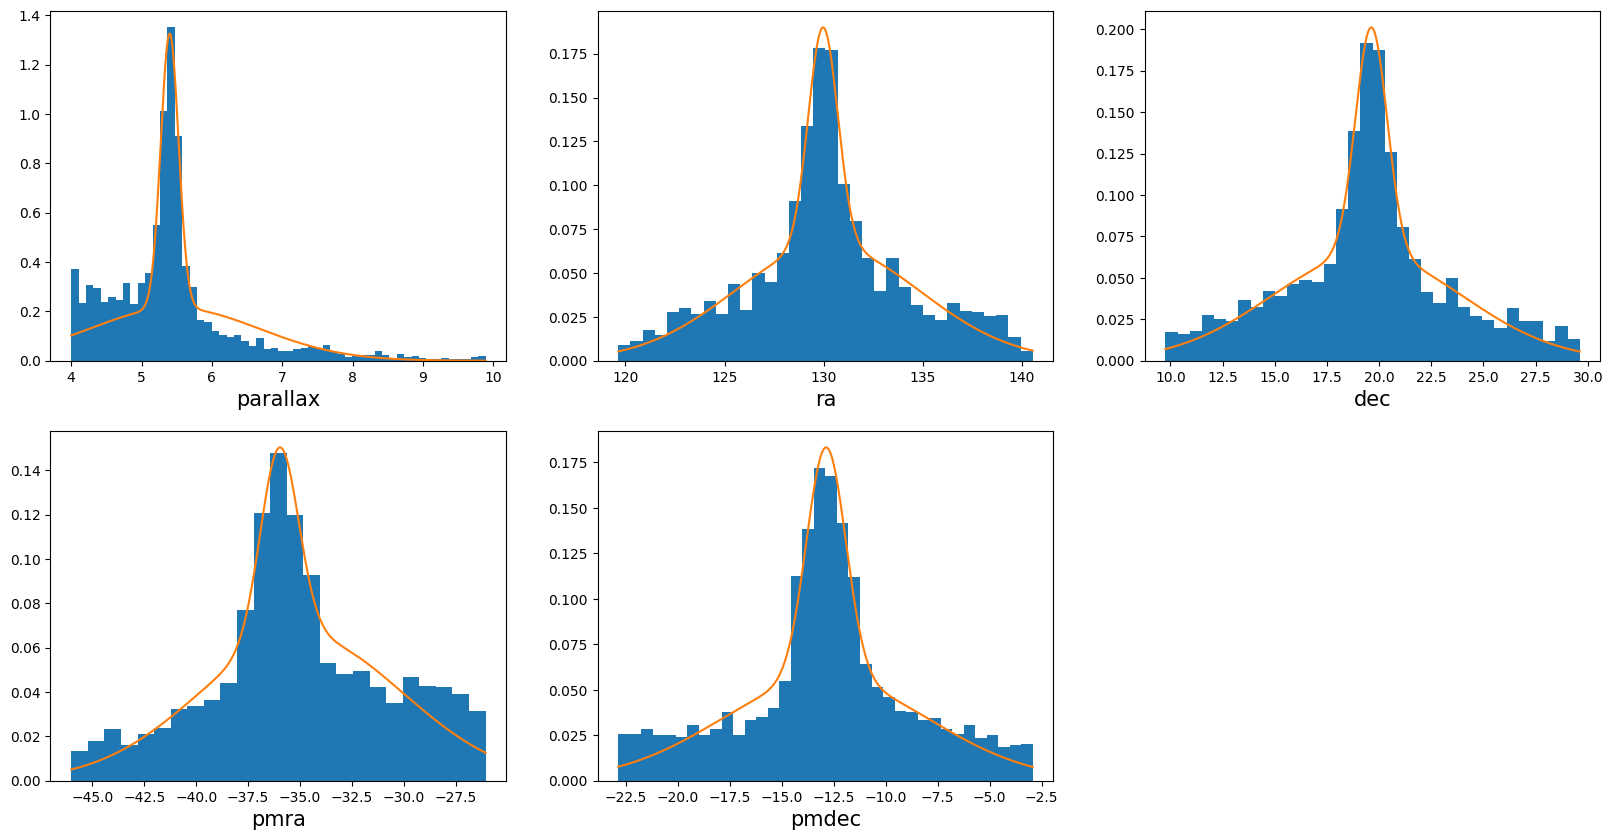

In [6]:
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
bin_heights,bin_borders,_=plt.hist(df.parallax,bins='auto',range=(min(df.parallax),max(df.parallax)),density=True)
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
x = np.linspace(bin_borders[0], bin_borders[-1], 10000)
plt.plot(x, gaussian_function(x, results_parallax.x))
plt.xlabel('parallax',fontsize=15)

plt.subplot(2,3,2)
bin_heights,bin_borders,_=plt.hist(df.ra,bins='auto',range=(min(df.ra),max(df.ra)),density=True)
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
x = np.linspace(bin_borders[0], bin_borders[-1], 10000)
plt.plot(x, gaussian_function(x, results_ra.x))
plt.xlabel('ra',fontsize=15)

plt.subplot(2,3,3)
bin_heights,bin_borders,_=plt.hist(df.dec,bins='auto',range=(min(df.dec),max(df.dec)),density=True)
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
x = np.linspace(bin_borders[0], bin_borders[-1], 10000)
plt.plot(x, gaussian_function(x, results_dec.x))
plt.xlabel('dec',fontsize=15)

plt.subplot(2,3,4)
bin_heights,bin_borders,_=plt.hist(df.pmra,bins='auto',range=(min(df.pmra),max(df.pmra)),density=True)
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
x = np.linspace(bin_borders[0], bin_borders[-1], 10000)
plt.plot(x, gaussian_function(x, results_pmra.x))
plt.xlabel('pmra',fontsize=15)
#plt.xlim(-100,100)

plt.subplot(2,3,5)
bin_heights,bin_borders,_=plt.hist(df.pmdec,bins='auto',range=(min(df.pmdec),max(df.pmdec)),density=True)
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
x = np.linspace(bin_borders[0], bin_borders[-1], 10000)
plt.plot(x, gaussian_function(x, results_pmdec.x))
plt.xlabel('pmdec',fontsize=15)
#plt.xlim(-100,100)
plt.show()

# Random resampling

In [7]:
popt = [results_parallax.x, results_ra.x, results_dec.x, results_pmra.x, results_pmdec.x]
names = ['parallax','ra','dec','pmra','pmdec']

for x,i in enumerate(names):
    print(popt[x], i)

[0.35279824 0.12654414 1.2074869  5.40011953 5.46742017] parallax
[  0.23269668   0.74297416   4.70352426 129.9614534  130.17257623] ra
[ 0.26131233  0.76045983  4.59877168 19.62807367 19.4244722 ] dec
[  0.1973617    0.91087209   4.89896867 -35.985411   -34.9395201 ] pmra
[  0.30072747   0.94150586   4.99382358 -12.86211659 -12.91389786] pmdec


In [8]:
def pdf(x, params):
    nc, s1, s2, mu1, mu2 = params
    Ac = -0.5*((x - mu1)/s1)**2
    Be = -0.5*((x - mu2)/s2)**2
    return nc/(np.sqrt(2*np.pi)*s1)*np.exp(Ac) + (1-nc)/(np.sqrt(2*np.pi)*s2)*np.exp(Be)

def Metropolis(N, data, params):
    nc, s1, s2, mu1, mu2 = params
    states = []
    burn_in = int(N * 0.1)
    #current = np.random.uniform(-5 * s1 - mu1, 5 * s1 + mu1)
    current = np.random.uniform(min(data), max(data))
    for i in range(N):
        states.append(current)
        #movement = np.random.uniform(-5 * s1 - mu1, 5 * s1 + mu1)
        movement = np.random.uniform(min(data), max(data))
        
        current_prob = pdf(current, params)
        movement_prob = pdf(movement, params)
        
        alpha = min(movement_prob/current_prob, 1)
        g = np.random.rand()
        
        if alpha > g:
            current = movement
            
    return states[burn_in:]

Text(0.5, 0, 'parallax')

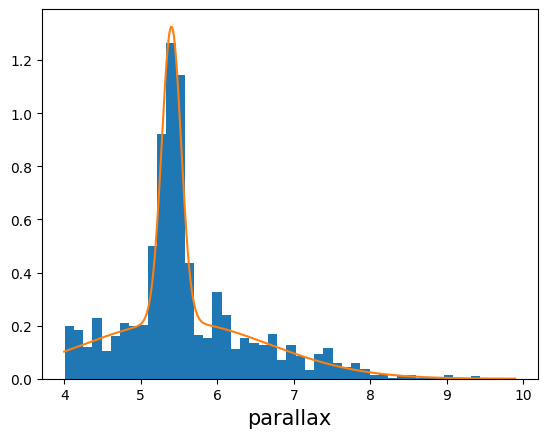

In [9]:
data = df.parallax
params = results_parallax.x
sampling = Metropolis(2000, data, params)
simulated_data = []
simulated_data.append(sampling)
plt.hist(sampling,bins='auto',density=True)
bin_heights, bin_borders=np.histogram(data,bins='auto',density=True)
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
x = np.linspace(bin_borders[0], bin_borders[-1], 10000)
plt.plot(x, pdf(x, params))
plt.xlabel('parallax',fontsize=15)

  0%|                                                    | 0/30 [00:00<?, ?it/s]

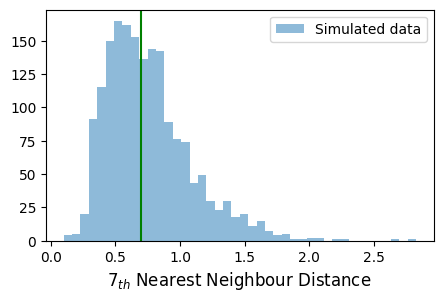

  3%|█▍                                          | 1/30 [00:03<01:28,  3.07s/it]

0.6991893416269772


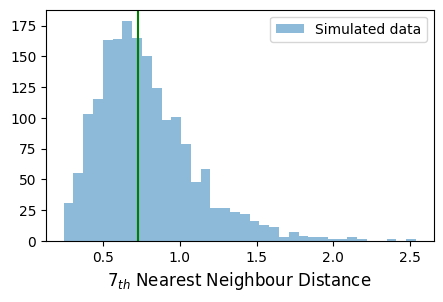

  7%|██▉                                         | 2/30 [00:05<01:21,  2.93s/it]

0.7275373504626983


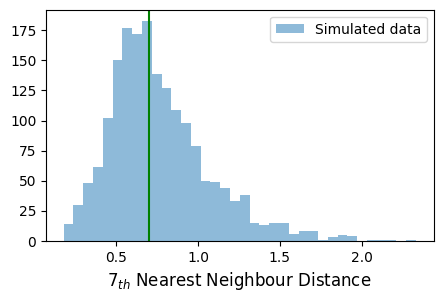

 10%|████▍                                       | 3/30 [00:08<01:17,  2.89s/it]

0.7031436596507583


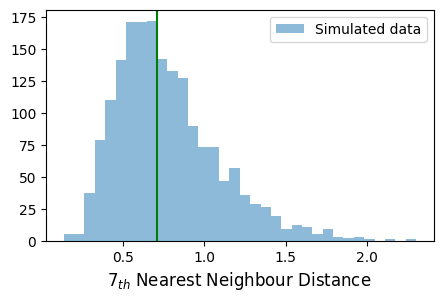

 13%|█████▊                                      | 4/30 [00:11<01:14,  2.87s/it]

0.7125515048242587


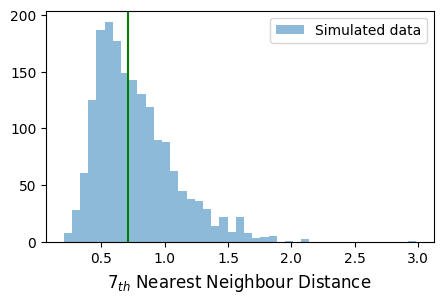

 17%|███████▎                                    | 5/30 [00:14<01:11,  2.85s/it]

0.7073010161342166


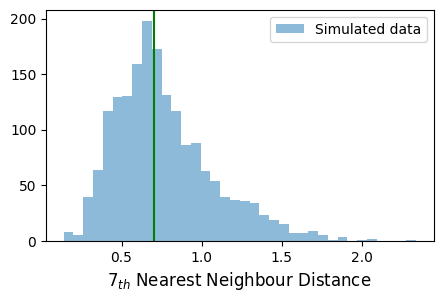

 20%|████████▊                                   | 6/30 [00:17<01:08,  2.84s/it]

0.7012103376603795


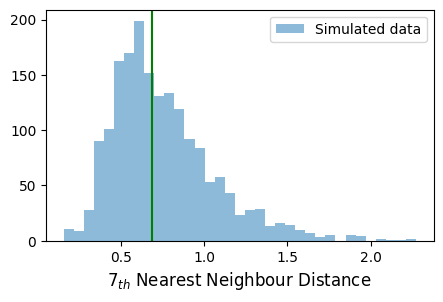

 23%|██████████▎                                 | 7/30 [00:20<01:05,  2.83s/it]

0.6873112334538176


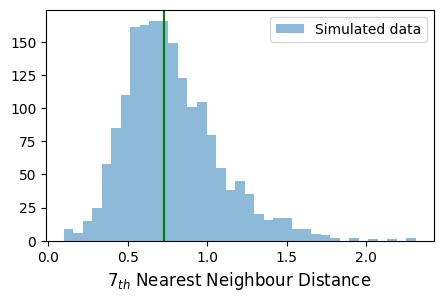

 27%|███████████▋                                | 8/30 [00:22<01:02,  2.83s/it]

0.731160725107607


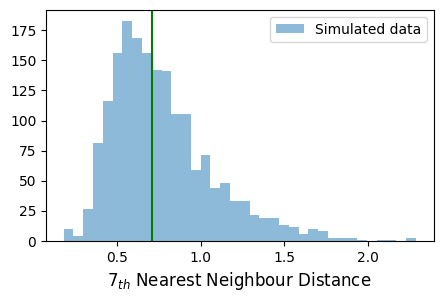

 30%|█████████████▏                              | 9/30 [00:25<01:00,  2.87s/it]

0.7070875674816318


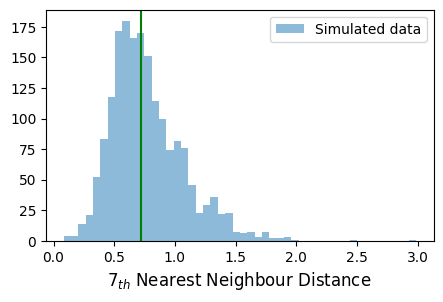

 33%|██████████████▎                            | 10/30 [00:28<00:57,  2.86s/it]

0.7183269481696885


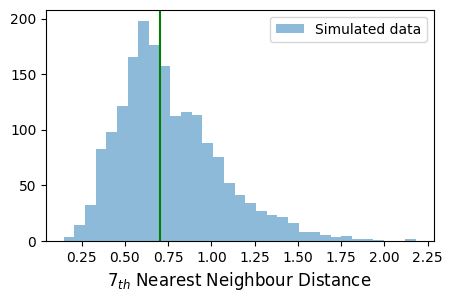

 37%|███████████████▊                           | 11/30 [00:31<00:54,  2.86s/it]

0.7048004159507264


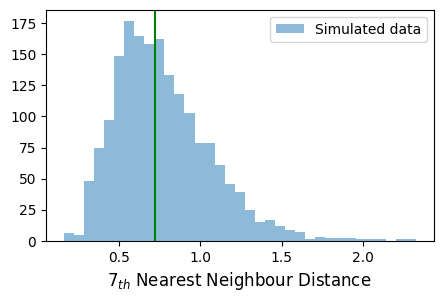

 40%|█████████████████▏                         | 12/30 [00:34<00:51,  2.84s/it]

0.7219306123732289


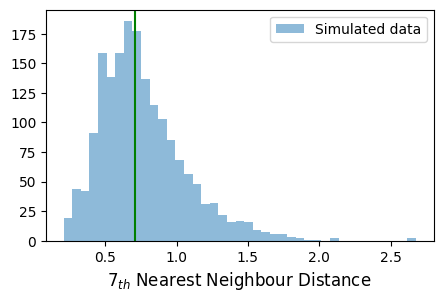

 43%|██████████████████▋                        | 13/30 [00:37<00:48,  2.84s/it]

0.7099712587293472


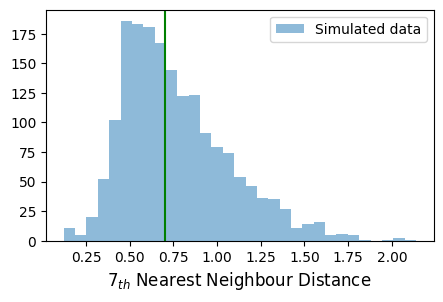

 47%|████████████████████                       | 14/30 [00:39<00:45,  2.84s/it]

0.7047037908814227


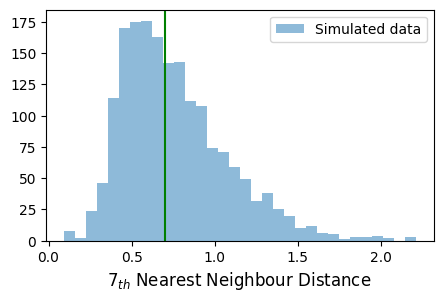

 50%|█████████████████████▌                     | 15/30 [00:42<00:42,  2.84s/it]

0.7014795406951861


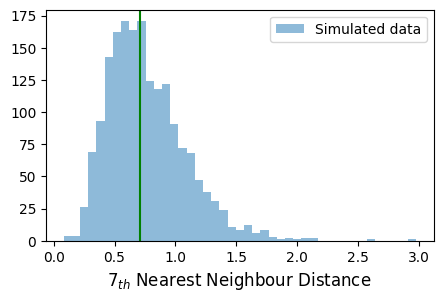

 53%|██████████████████████▉                    | 16/30 [00:45<00:39,  2.85s/it]

0.7100182454759368


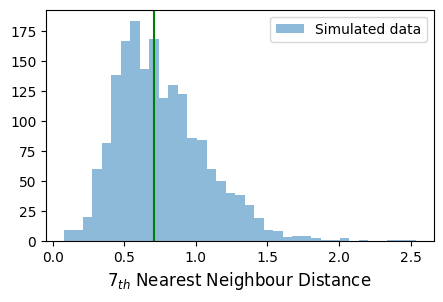

 57%|████████████████████████▎                  | 17/30 [00:48<00:36,  2.85s/it]

0.7068607933936167


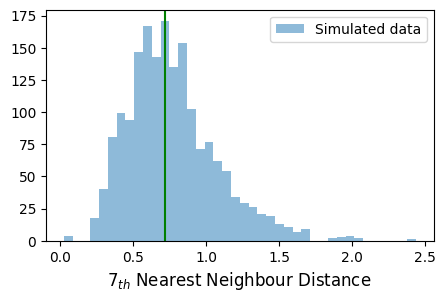

 60%|█████████████████████████▊                 | 18/30 [00:51<00:34,  2.84s/it]

0.7172983263338684


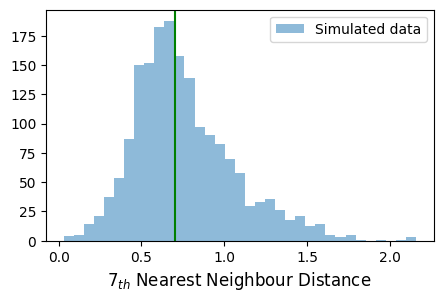

 63%|███████████████████████████▏               | 19/30 [00:54<00:31,  2.87s/it]

0.700087373019356


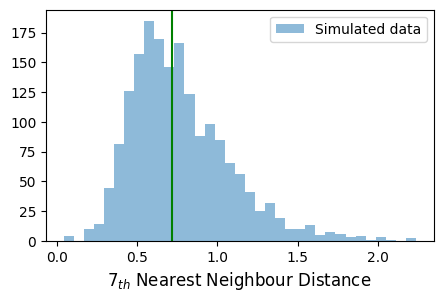

 67%|████████████████████████████▋              | 20/30 [00:57<00:28,  2.86s/it]

0.7162364848575102


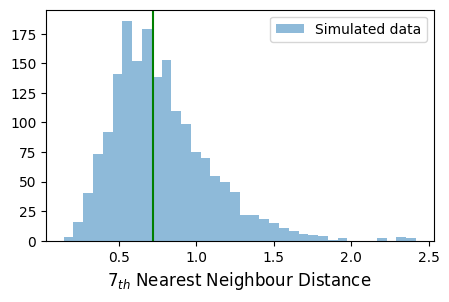

 70%|██████████████████████████████             | 21/30 [00:59<00:25,  2.85s/it]

0.719955882815899


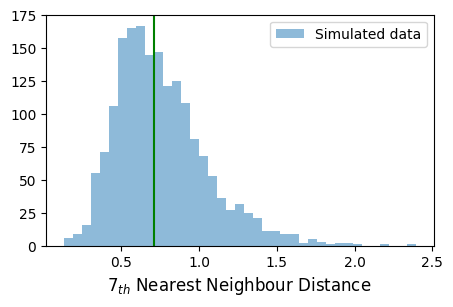

 73%|███████████████████████████████▌           | 22/30 [01:02<00:22,  2.85s/it]

0.7120433589591935


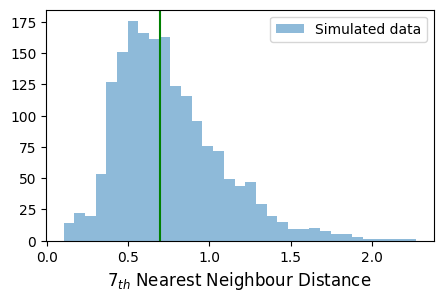

 77%|████████████████████████████████▉          | 23/30 [01:05<00:19,  2.85s/it]

0.6981161808239646


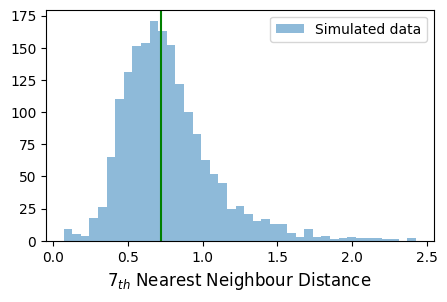

 80%|██████████████████████████████████▍        | 24/30 [01:08<00:17,  2.85s/it]

0.7206361398784173


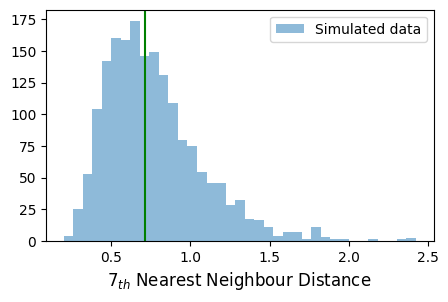

 83%|███████████████████████████████████▊       | 25/30 [01:11<00:14,  2.84s/it]

0.7131830813583357


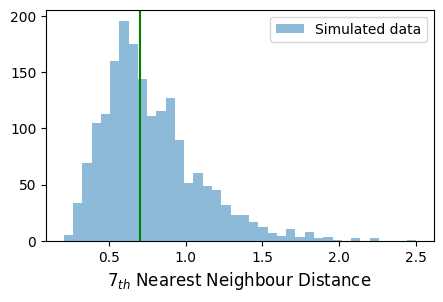

 87%|█████████████████████████████████████▎     | 26/30 [01:14<00:11,  2.84s/it]

0.7036009254089959


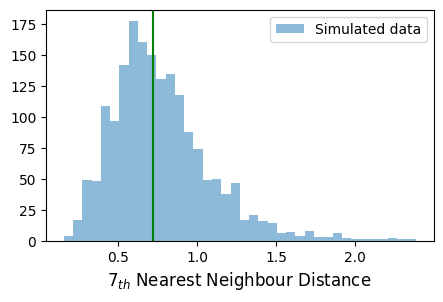

 90%|██████████████████████████████████████▋    | 27/30 [01:16<00:08,  2.83s/it]

0.722204324440701


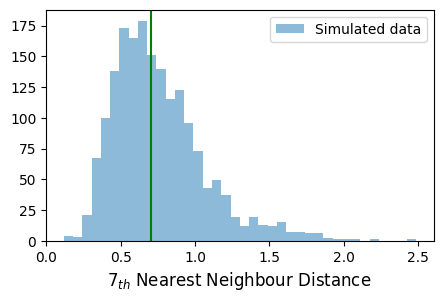

 93%|████████████████████████████████████████▏  | 28/30 [01:19<00:05,  2.84s/it]

0.701497131241246


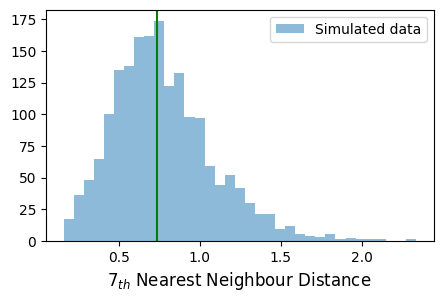

 97%|█████████████████████████████████████████▌ | 29/30 [01:22<00:02,  2.86s/it]

0.7339601885450836


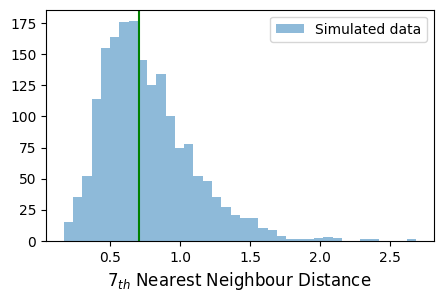

100%|███████████████████████████████████████████| 30/30 [01:25<00:00,  2.85s/it]

0.7043778372169498


In [10]:
eps_simulated = []
for k in tqdm(range(0, 30)):
    names = ['parallax','ra','dec','pmra','pmdec']
    params = [results_parallax.x, results_ra.x, results_dec.x, results_pmra.x, results_pmdec.x]
    simulated_data = []
    for x,i in enumerate(names):
        n_iteraciones = 2000
        #nc, s1, s2, mu1, mu2 = params[x]
        parameters = params[x]
        data = df[i]
        sampling = Metropolis(n_iteraciones, data, parameters)
        simulated_data.append(sampling)
        #plt.figure(figsize=(5,3))
        #bin_heights, bin_borders,_=plt.hist(sampling, bins='auto',density=True)
        #bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
        #x = np.linspace(bin_borders[0], bin_borders[-1], 10000)
        #plt.plot(x, pdf(x, parameters))
        #plt.xlabel(i, fontsize=12)
        #plt.legend()
        #plt.show()
    
    df_simulated=pd.DataFrame(np.array(simulated_data).transpose(),\
                              columns=['parallax','ra','dec','pmra','pmdec'])
    df_simulated = df_simulated.astype('float32')
    df_simulated = StandardScaler().fit(df_simulated).transform(df_simulated)

    neigh = NearestNeighbors(n_neighbors = 7, algorithm = 'ball_tree', n_jobs=4).fit(df_simulated)
    distances_simulated, indices = neigh.kneighbors(df_simulated)
    distances_simulated = np.sort(np.median(distances_simulated, axis = 1))
    distances_simulated = distances_simulated[(distances_simulated != 0.0)]
    
    hist, bin_edges = np.histogram(distances_simulated, bins='auto',
                                   range=(0.01,max(distances_simulated)))
    #i = hist.argmax()
    #eps_simulated.append(bin_edges[i])
    eps_simulated.append(np.median(distances_simulated))
    plt.figure(figsize=(5,3))
    #plt.hist(distances, bins='auto', label='Region of Blanco 1',histtype=u'step')
    plt.hist(distances_simulated, bins='auto', label='Simulated data', alpha=0.5)#histtype=u'step'
    plt.xlabel(r'$7_{th}$ Nearest Neighbour Distance ', fontsize=12)
    #plt.xlim(0,0.6)
    plt.axvline(eps_simulated[k],c='green')
    plt.legend()
    plt.show()
    print(eps_simulated[k])

In [11]:
#np.savetxt('./pleiades_eps_simulated.txt', eps_simulated, delimiter=',')
eps_simulated

[0.6991893416269772,
 0.7275373504626983,
 0.7031436596507583,
 0.7125515048242587,
 0.7073010161342166,
 0.7012103376603795,
 0.6873112334538176,
 0.731160725107607,
 0.7070875674816318,
 0.7183269481696885,
 0.7048004159507264,
 0.7219306123732289,
 0.7099712587293472,
 0.7047037908814227,
 0.7014795406951861,
 0.7100182454759368,
 0.7068607933936167,
 0.7172983263338684,
 0.700087373019356,
 0.7162364848575102,
 0.719955882815899,
 0.7120433589591935,
 0.6981161808239646,
 0.7206361398784173,
 0.7131830813583357,
 0.7036009254089959,
 0.722204324440701,
 0.701497131241246,
 0.7339601885450836,
 0.7043778372169498]

# K Nearest Neighbour Distance

In [12]:
data = df[['parallax','ra','dec','pmra','pmdec']]
data = data.astype('float32')
data = StandardScaler().fit(data).transform(data)

neigh = NearestNeighbors(n_neighbors=7, algorithm = 'ball_tree',n_jobs=4).fit(data)
real_distances, indices = neigh.kneighbors(data)
real_distances = np.sort(real_distances, axis=0)
real_distances = np.array(real_distances[:,1])
#distances_simulated = distances_simulated[(distances_simulated != 0.0)]
#eps_simulated = np.loadtxt('./pleiades_eps_simulated.txt')

hist, bin_edges = np.histogram(real_distances, bins='auto',range=(min(real_distances),max(real_distances)))
i = hist.argmax()
max_value = bin_edges[i]
#max_value = np.mean(bin_edges)
average_eps_simulated = np.average(eps_simulated)
print(average_eps_simulated, max_value)
print((average_eps_simulated+max_value)/2)

0.7105927192323672 0.030645087180594697
0.37061890320648094


In [14]:
df_pm = pd.read_csv('./data/beehive_pm.csv')
#df_pm = pd.read_csv('./pleiades_pm_corrected_distance.csv')
df_pm['parallax'] = df_pm['parallax'] * 1000
df_pm['parallax_error'] = df_pm['parallax_error'] * 1000

data_pm = df_pm[['parallax','ra','dec','pmra','pmdec']]
data_pm = data_pm.astype('float32')
data_pm = StandardScaler().fit(data_pm).transform(data_pm)

neigh = NearestNeighbors(n_neighbors=7, algorithm = 'ball_tree',n_jobs=4).fit(data_pm)
distances_pm, indices_pm = neigh.kneighbors(data_pm)
distances_pm = np.sort(distances_pm, axis=0)
distances_pm = np.array(distances_pm[:,1])

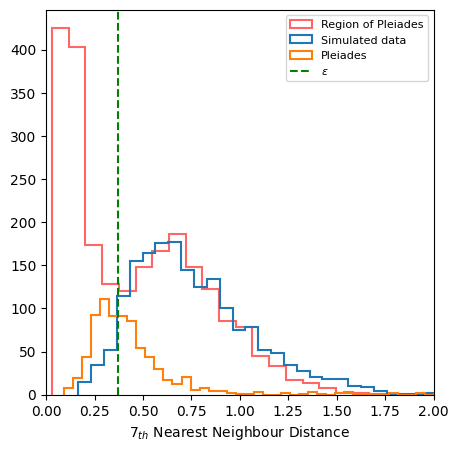

In [16]:
hist, bin_edges = np.histogram(distances_pm, bins='auto',range=(min(distances_pm),max(distances_pm)))
i = hist.argmax()
max_value_pm = bin_edges[i]

fig, ax = plt.subplots(figsize=[5, 5]) 
#plt.subplots_adjust(bottom = 0.15)
ax.hist(real_distances, bins='auto', label='Region of Pleiades',histtype=u'step',color='red',lw=1.5,alpha=0.6)
ax.hist(distances_simulated, bins='auto', label='Simulated data',histtype=u'step',lw=1.5)
ax.hist(distances_pm, bins='auto', label='Pleiades',histtype=u'step',lw=1.5)
plt.xlabel(r'$7_{th}$ Nearest Neighbour Distance ', fontsize=10)
plt.xlim(0.0,2.0)
plt.axvline((max_value+average_eps_simulated)/2,c='green',label=r'$\epsilon$',ls='--')
plt.legend(fontsize=8)
#plt.savefig('./results/pleiades_7nnd_nuevo.png',bbox_inches='tight')

In [17]:
print('max_value:',max_value)
print('Average eps simulated:',average_eps_simulated)
eps = (max_value + average_eps_simulated)/2
#eps1 = max_value_pm
#print(eps1)
print('eps:',eps)

max_value: 0.030645087180594697
Average eps simulated: 0.7105927192323672
eps: 0.37061890320648094


In [18]:
db = DBSCAN(eps = eps, min_samples = 8, n_jobs = 4, algorithm='ball_tree').fit(data)
labels = db.labels_ 
df['Clusters'] = labels
for i in list(set(labels)):
    print('{} {}'.format(i,len(df[(df['Clusters'] == i)])))

0 885
-1 1423


In [11]:
#for i in list(set(labels)):
#    if len(df[(df['Clusters'] == i)]) > 50:
#        print('{} {}'.format(i,len(df[(df['Clusters'] == i)])))

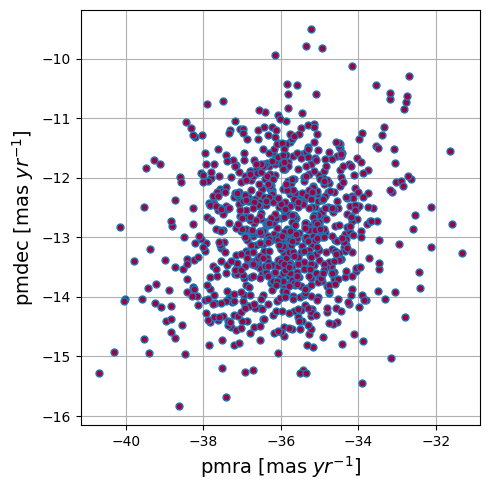

In [19]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

plt.figure(figsize=(5,5))
for i, j in zip(list(unique_labels), colors):
    if not i == -1:# or i == 0:
        plt.plot(df['pmra'][(df['Clusters'] == i)], df['pmdec'][(df['Clusters'] == i)], 
         markerfacecolor = tuple(j),marker = 'o', linestyle='None',markersize = 5, alpha = 1)
#else:
        #plt.plot(df['pmra'][(df['Clusters'] == i)], df['pmdec'][(df['Clusters'] == i)], 
        # color = 'black', marker='o' ,linestyle = 'None', markersize = 5, alpha = 1)
        #plt.scatter(0,0,marker='.')
plt.xlabel("pmra [mas $yr^{-1}$]",  fontsize = 14)
plt.ylabel("pmdec [mas $yr^{-1}$]",  fontsize = 14)#,rotation=0)
#plt.xlim(-40,20)
#plt.ylim(-20,40)
plt.tight_layout()
plt.grid()
#plt.savefig('./dbscan_images/beehive_vpd_dbscan_complete.jpg',bbos_inches='tight')
plt.show() #should be on pmra(-26,-16) and pmdec(10,20)

<Figure size 500x500 with 0 Axes>

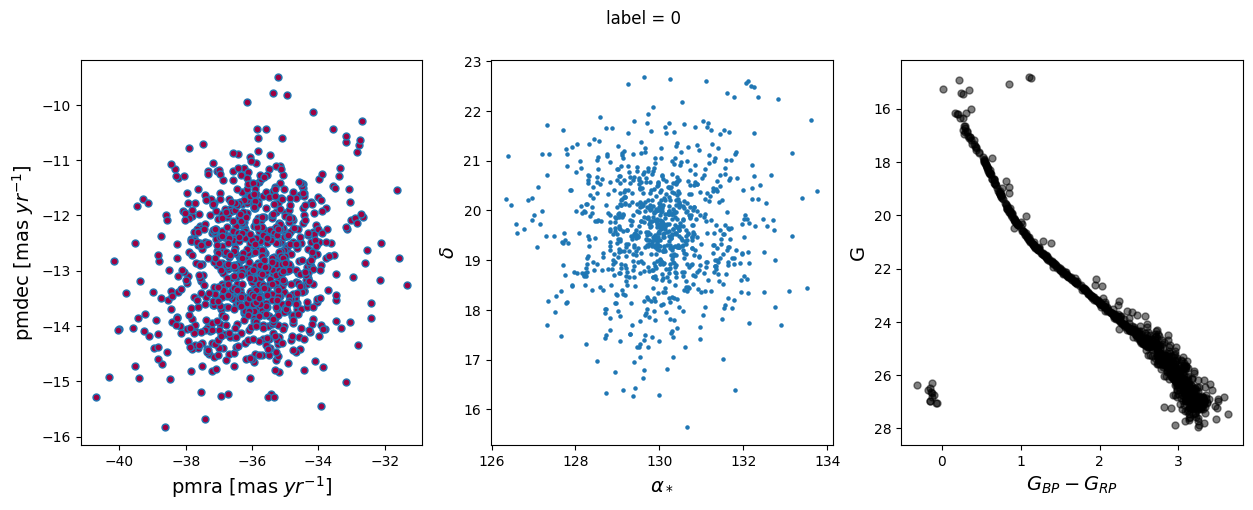

In [20]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

plt.figure(figsize=(5,5))
for i, j in zip(list(unique_labels), colors):
    if not i == -1 and len(df[(df['Clusters'] == i)]) > 50:# or i == 0:
        
        plt.figure(figsize=(15,5))
        plt.suptitle('label = {}'.format(i))
        plt.subplot(1,3,1)
        plt.plot(df['pmra'][(df['Clusters'] == i)], df['pmdec'][(df['Clusters'] == i)], 
         markerfacecolor = tuple(j),marker = 'o', linestyle='None',markersize = 5, alpha = 1)
        plt.xlabel("pmra [mas $yr^{-1}$]",  fontsize = 14)
        plt.ylabel("pmdec [mas $yr^{-1}$]",  fontsize = 14)#,rotation=0)
        
        plt.subplot(1,3,2)
        plt.scatter(df['ra'][(df['Clusters'] == i)], df['dec'][(df['Clusters'] == i)], marker='o' , s=5, alpha = 1)
        plt.xlabel(r'$\alpha_*$',fontsize = 14)
        plt.ylabel(r'$\delta$',fontsize = 14)
        
        g_mag = df['g'][(df['Clusters'] == i)] + 5 - 5*np.log10(1/df['parallax'][(df['Clusters'] == i)])
        color = df['bp'][(df['Clusters'] == i)] - df['rp'][(df['Clusters'] == i)]
        plt.subplot(1,3,3)
        plt.plot(color, g_mag,color='black',marker='o',linestyle='None',markersize=5,alpha=0.5)
        plt.xlabel("$G_{BP}-G_{RP}$", fontsize = 14)
        plt.ylabel("G", fontsize = 14)
        plt.gca().invert_yaxis()

plt.show() #should be on pmra(-26,-16) and pmdec(10,20)

In [21]:
# n = 3
# plt.figure(figsize=(15,5))
# plt.subplot(1,3,1)
# plt.scatter(df['pmra'][(df['Clusters'] == n)], df['pmdec'][(df['Clusters'] == n)], 
#              color = 'black', marker='o' , s = 5, alpha = 1)
# plt.xlabel("pmra [mas $yr^{-1}$]", fontsize = 14)
# plt.ylabel("pmdec [mas $yr^{-1}$]", fontsize = 14)#,rotation=0)
# #plt.xlim(-40,20)
# #plt.ylim(-20,40)

# plt.subplot(1,3,2)
# plt.scatter(df['ra'][(df['Clusters'] == n)], df['dec'][(df['Clusters'] == n)], marker='o' , s=5, alpha = 1)
# plt.xlabel(r'$\alpha_*$',fontsize = 14)
# plt.ylabel(r'$\delta$',fontsize = 14)

# g_mag = df['g'][(df['Clusters'] == n)] + 5 - 5*np.log10(1/df['parallax'][(df['Clusters'] == n)])
# color = df['bp'][(df['Clusters'] == n)] - df['rp'][(df['Clusters'] == n)]
# plt.subplot(1,3,3)
# plt.plot(color, g_mag,color='black',marker='o',linestyle='None',markersize=5,alpha=0.5)
# plt.xlabel("$G_{BP}-G_{RP}$", fontsize = 14)
# plt.ylabel("G", fontsize = 14)
# plt.gca().invert_yaxis()
# #plt.savefig('./vpd.jpg')
# plt.show()

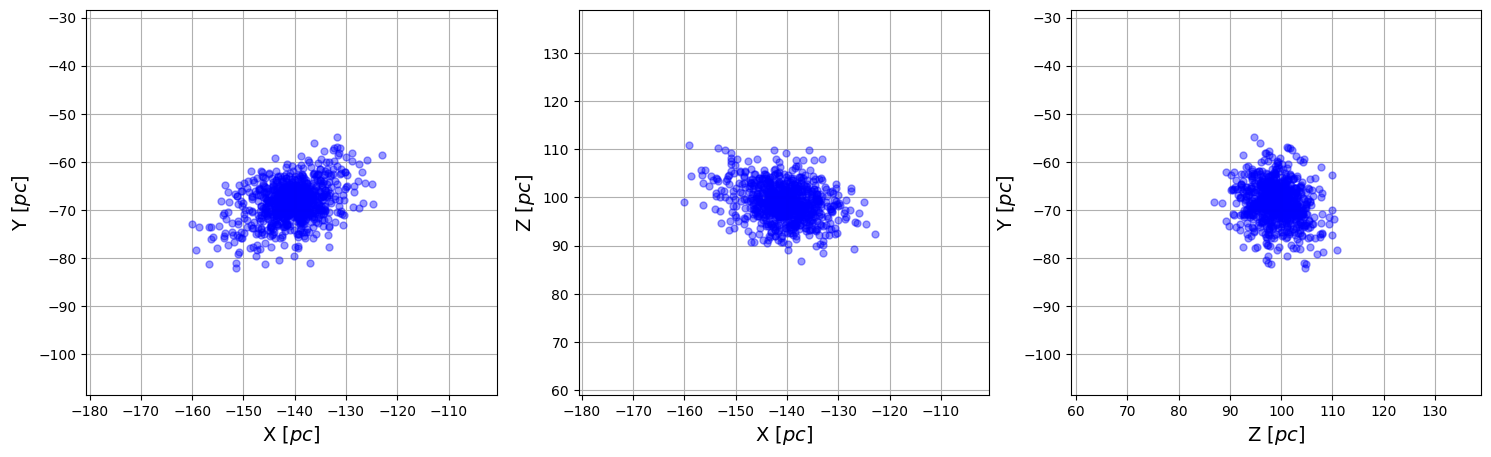

In [22]:
import astropy.units as u
import astropy.coordinates as apycoords

n = 0
df_test = df[(df['Clusters'] == n)]
df_test['parallax'] = df_test['parallax'] / 1000
df_test['parallax_error'] = df_test['parallax_error'] / 1000
df_test.to_csv('./beehive_db.csv')

ra_ = df_test['ra'] *u.deg
dec_ = df_test['dec'] *u.deg
distance_ = np.array(1/df_test['parallax']) *u.pc

c = apycoords.SkyCoord(ra=ra_,dec=dec_,distance=distance_,frame='icrs')
#print("(X,Y,Z) in (kpc,kpc,kpc)")
#print("\t",c.galactic.cartesian)
x = c.galactic.cartesian.x
y = c.galactic.cartesian.y
z = c.galactic.cartesian.z

xp = np.mean(x.to_value())
yp = np.mean(y.to_value())
zp = np.mean(z.to_value())
value = 40

%matplotlib inline
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
plt.plot(x, y,color='blue',marker='o',linestyle='None',markersize=5,alpha=0.4)
plt.xlim(xp - value,xp + value)
plt.ylim(yp - value,yp + value)
plt.xlabel("X $[pc]$", fontsize = 14)
plt.ylabel("Y $[pc]$", fontsize = 14)#,rotation=0)
plt.grid()

plt.subplot(1,3,2)
plt.plot(x, z,color='blue',marker='o',linestyle='None',markersize=5,alpha=0.4)
plt.xlim(xp - value,xp + value)
plt.ylim(zp - value,zp + value)
plt.xlabel("X $[pc]$", fontsize = 14)
plt.ylabel("Z $[pc]$", fontsize = 14)#,rotation=0)
plt.grid()

plt.subplot(1,3,3)
plt.plot(z, y,color='blue',marker='o',linestyle='None',markersize=5,alpha=0.4)
plt.xlim(zp - value,zp + value)
plt.ylim(yp - value,yp + value)
plt.xlabel("Z $[pc]$", fontsize = 14)
plt.ylabel("Y $[pc]$", fontsize = 14)#,rotation=0)
plt.grid()
#plt.savefig('./results/distribucion_espacial_test.jpg')
plt.show()

In [16]:
#df_test = df[(df['Clusters'] == n)]
#df_test.to_csv('./beehive_dbscan.csv')

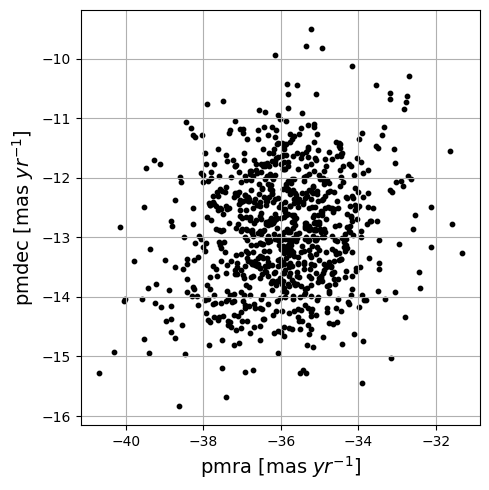

In [23]:
plt.figure(figsize=(5,5))
plt.grid()
plt.scatter(df['pmra'][(df['Clusters']==n)],df['pmdec'][(df['Clusters']==n)],color='black',marker='o',s=10,alpha=1)
plt.xlabel("pmra [mas $yr^{-1}$]", fontsize = 14)
plt.ylabel("pmdec [mas $yr^{-1}$]", fontsize = 14)#,rotation=0)
#plt.xlim(-40,20)
#plt.ylim(-20,40)
plt.tight_layout()
#plt.savefig('./dbscan_images/beehive_vpd_dbscan.jpg',bbox_inches='tight')
plt.show()